<a href="https://colab.research.google.com/github/jpupkies/Jim-Pupkies/blob/master/Decision_Suppression_Under_Downstream_Irreversibility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Suppression Under Downstream Irreversibility

## Step 1 — Decision Context and Irreversibility Surface

### Context
This system evaluates automated decisions whose downstream effects may be asymmetric, irreversible, or costly to unwind.

### What This Step Does
Defines the decision space and introduces irreversibility as a first-class system attribute, independent of model confidence.

In [13]:
import numpy as np
import pandas as pd

np.random.seed(42)

n = 500

decision_context = pd.DataFrame({
    "decision_id": range(n),
    "base_confidence": np.random.beta(4, 2, size=n),
    "reversibility": np.random.beta(2, 5, size=n),
    "blast_radius": np.random.uniform(0, 1, size=n),
    "recovery_cost": np.random.uniform(0, 1, size=n)
})

decision_context.head()

,decision_id,base_confidence,reversibility,blast_radius,recovery_cost
0,0,0.758836,0.260554,0.209690,0.236610
1,1,0.700711,0.087514,0.976561,0.483498
2,2,0.726062,0.449641,0.645603,0.429149
3,3,0.534785,0.287177,0.934544,0.074896
4,4,0.950543,0.261358,0.303386,0.106160


from matplotlib import pyplot as plt
_df_80['decision_id'].plot(kind='hist', bins=20, title='decision_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_81['base_confidence'].plot(kind='hist', bins=20, title='base_confidence')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_82['reversibility'].plot(kind='hist', bins=20, title='reversibility')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_83['blast_radius'].plot(kind='hist', bins=20, title='blast_radius')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_84.plot(kind='scatter', x='decision_id', y='base_confidence', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_85.plot(kind='scatter', x='base_confidence', y='reversibility', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_86.plot(kind='scatter', x='reversibility', y='blast_radius', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_87.plot(kind='scatter', x='blast_radius', y='recovery_cost', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['decision_id']
  ys = series['base_confidence']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_88.sort_values('decision_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('decision_id')
_ = plt.ylabel('base_confidence')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['decision_id']
  ys = series['reversibility']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_89.sort_values('decision_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('decision_id')
_ = plt.ylabel('reversibility')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['decision_id']
  ys = series['blast_radius']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_90.sort_values('decision_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('decision_id')
_ = plt.ylabel('blast_radius')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['decision_id']
  ys = series['recovery_cost']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_91.sort_values('decision_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('decision_id')
_ = plt.ylabel('recovery_cost')

from matplotlib import pyplot as plt
_df_92['decision_id'].plot(kind='line', figsize=(8, 4), title='decision_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_93['base_confidence'].plot(kind='line', figsize=(8, 4), title='base_confidence')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_94['reversibility'].plot(kind='line', figsize=(8, 4), title='reversibility')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_95['blast_radius'].plot(kind='line', figsize=(8, 4), title='blast_radius')
plt.gca().spines[['top', 'right']].set_visible(False)

## Step 2 — Model Uncertainty Quantification

### Context
Model uncertainty must be isolated from downstream risk to avoid conflating prediction confidence with decision safety.

### What This Step Does
Derives uncertainty strictly from model behavior using dispersion and entropy-based proxies.

In [14]:
from scipy.stats import entropy

confidence_samples = np.random.normal(
    loc=decision_context["base_confidence"].values[:, None],
    scale=0.05,
    size=(n, 20)
).clip(0, 1)

decision_context["confidence_std"] = confidence_samples.std(axis=1)
decision_context["confidence_entropy"] = entropy(
    np.vstack([confidence_samples.mean(axis=1), 1 - confidence_samples.mean(axis=1)]),
    base=2
)

decision_context.head()

,decision_id,base_confidence,reversibility,blast_radius,recovery_cost,confidence_std,confidence_entropy
0,0,0.758836,0.260554,0.209690,0.236610,0.046409,0.795896
1,1,0.700711,0.087514,0.976561,0.483498,0.040799,0.883047
2,2,0.726062,0.449641,0.645603,0.429149,0.049109,0.846137
3,3,0.534785,0.287177,0.934544,0.074896,0.042194,0.994593
4,4,0.950543,0.261358,0.303386,0.106160,0.038161,0.310339


from matplotlib import pyplot as plt
_df_96['decision_id'].plot(kind='hist', bins=20, title='decision_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_97['base_confidence'].plot(kind='hist', bins=20, title='base_confidence')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_98['reversibility'].plot(kind='hist', bins=20, title='reversibility')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_99['blast_radius'].plot(kind='hist', bins=20, title='blast_radius')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_100.plot(kind='scatter', x='decision_id', y='base_confidence', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_101.plot(kind='scatter', x='base_confidence', y='reversibility', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_102.plot(kind='scatter', x='reversibility', y='blast_radius', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_103.plot(kind='scatter', x='blast_radius', y='recovery_cost', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['decision_id']
  ys = series['base_confidence']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_104.sort_values('decision_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('decision_id')
_ = plt.ylabel('base_confidence')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['decision_id']
  ys = series['reversibility']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_105.sort_values('decision_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('decision_id')
_ = plt.ylabel('reversibility')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['decision_id']
  ys = series['blast_radius']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_106.sort_values('decision_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('decision_id')
_ = plt.ylabel('blast_radius')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['decision_id']
  ys = series['recovery_cost']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_107.sort_values('decision_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('decision_id')
_ = plt.ylabel('recovery_cost')

from matplotlib import pyplot as plt
_df_108['decision_id'].plot(kind='line', figsize=(8, 4), title='decision_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_109['base_confidence'].plot(kind='line', figsize=(8, 4), title='base_confidence')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_110['reversibility'].plot(kind='line', figsize=(8, 4), title='reversibility')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_111['blast_radius'].plot(kind='line', figsize=(8, 4), title='blast_radius')
plt.gca().spines[['top', 'right']].set_visible(False)

## Step 3 — Data Uncertainty and Signal Fragility

### Context
Data uncertainty reflects input fragility, missing signals, and proxy reliability—not model behavior.

### What This Step Does
Introduces a data uncertainty score independent of prediction confidence.

In [15]:
decision_context["data_sparsity"] = np.random.beta(3, 3, size=n)
decision_context["signal_conflict"] = np.random.beta(2, 4, size=n)

decision_context["data_uncertainty"] = (
    0.6 * decision_context["data_sparsity"] +
    0.4 * decision_context["signal_conflict"]
)

decision_context.head()

,decision_id,base_confidence,reversibility,blast_radius,recovery_cost,confidence_std,confidence_entropy,data_sparsity,signal_conflict,data_uncertainty
0,0,0.758836,0.260554,0.209690,0.236610,0.046409,0.795896,0.727435,0.252134,0.537315
1,1,0.700711,0.087514,0.976561,0.483498,0.040799,0.883047,0.282435,0.313487,0.294856
2,2,0.726062,0.449641,0.645603,0.429149,0.049109,0.846137,0.553263,0.202733,0.413051
3,3,0.534785,0.287177,0.934544,0.074896,0.042194,0.994593,0.300564,0.374150,0.329998
4,4,0.950543,0.261358,0.303386,0.106160,0.038161,0.310339,0.169256,0.266605,0.208196


from matplotlib import pyplot as plt
_df_112['decision_id'].plot(kind='hist', bins=20, title='decision_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_113['base_confidence'].plot(kind='hist', bins=20, title='base_confidence')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_114['reversibility'].plot(kind='hist', bins=20, title='reversibility')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_115['blast_radius'].plot(kind='hist', bins=20, title='blast_radius')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_116.plot(kind='scatter', x='decision_id', y='base_confidence', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_117.plot(kind='scatter', x='base_confidence', y='reversibility', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_118.plot(kind='scatter', x='reversibility', y='blast_radius', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_119.plot(kind='scatter', x='blast_radius', y='recovery_cost', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['decision_id']
  ys = series['base_confidence']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_120.sort_values('decision_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('decision_id')
_ = plt.ylabel('base_confidence')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['decision_id']
  ys = series['reversibility']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_121.sort_values('decision_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('decision_id')
_ = plt.ylabel('reversibility')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['decision_id']
  ys = series['blast_radius']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_122.sort_values('decision_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('decision_id')
_ = plt.ylabel('blast_radius')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['decision_id']
  ys = series['recovery_cost']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_123.sort_values('decision_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('decision_id')
_ = plt.ylabel('recovery_cost')

from matplotlib import pyplot as plt
_df_124['decision_id'].plot(kind='line', figsize=(8, 4), title='decision_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_125['base_confidence'].plot(kind='line', figsize=(8, 4), title='base_confidence')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_126['reversibility'].plot(kind='line', figsize=(8, 4), title='reversibility')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_127['blast_radius'].plot(kind='line', figsize=(8, 4), title='blast_radius')
plt.gca().spines[['top', 'right']].set_visible(False)

## Step 4 — Downstream Irreversibility Scoring

### Context
Some decisions should not be made even when confidence is high due to asymmetric or irreversible outcomes.

### What This Step Does
Computes an irreversibility score independent of uncertainty signals.

In [16]:
decision_context["irreversibility_score"] = (
    (1 - decision_context["reversibility"]) * 0.4 +
    decision_context["blast_radius"] * 0.3 +
    decision_context["recovery_cost"] * 0.3
)

decision_context.head()

,decision_id,base_confidence,reversibility,blast_radius,recovery_cost,confidence_std,confidence_entropy,data_sparsity,signal_conflict,data_uncertainty,irreversibility_score
0,0,0.758836,0.260554,0.209690,0.236610,0.046409,0.795896,0.727435,0.252134,0.537315,0.429669
1,1,0.700711,0.087514,0.976561,0.483498,0.040799,0.883047,0.282435,0.313487,0.294856,0.803012
2,2,0.726062,0.449641,0.645603,0.429149,0.049109,0.846137,0.553263,0.202733,0.413051,0.542569
3,3,0.534785,0.287177,0.934544,0.074896,0.042194,0.994593,0.300564,0.374150,0.329998,0.587961
4,4,0.950543,0.261358,0.303386,0.106160,0.038161,0.310339,0.169256,0.266605,0.208196,0.418320


from matplotlib import pyplot as plt
_df_128['decision_id'].plot(kind='hist', bins=20, title='decision_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_129['base_confidence'].plot(kind='hist', bins=20, title='base_confidence')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_130['reversibility'].plot(kind='hist', bins=20, title='reversibility')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_131['blast_radius'].plot(kind='hist', bins=20, title='blast_radius')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_132.plot(kind='scatter', x='decision_id', y='base_confidence', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_133.plot(kind='scatter', x='base_confidence', y='reversibility', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_134.plot(kind='scatter', x='reversibility', y='blast_radius', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_135.plot(kind='scatter', x='blast_radius', y='recovery_cost', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['decision_id']
  ys = series['base_confidence']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_136.sort_values('decision_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('decision_id')
_ = plt.ylabel('base_confidence')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['decision_id']
  ys = series['reversibility']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_137.sort_values('decision_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('decision_id')
_ = plt.ylabel('reversibility')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['decision_id']
  ys = series['blast_radius']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_138.sort_values('decision_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('decision_id')
_ = plt.ylabel('blast_radius')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['decision_id']
  ys = series['recovery_cost']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_139.sort_values('decision_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('decision_id')
_ = plt.ylabel('recovery_cost')

from matplotlib import pyplot as plt
_df_140['decision_id'].plot(kind='line', figsize=(8, 4), title='decision_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_141['base_confidence'].plot(kind='line', figsize=(8, 4), title='base_confidence')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_142['reversibility'].plot(kind='line', figsize=(8, 4), title='reversibility')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_143['blast_radius'].plot(kind='line', figsize=(8, 4), title='blast_radius')
plt.gca().spines[['top', 'right']].set_visible(False)

## Step 5 — Decision Risk Composition

### Context
Decision risk emerges from interaction between uncertainty and irreversibility, not from either alone.

### What This Step Does
Constructs a composite risk surface without collapsing signals prematurely.

In [17]:
decision_context["model_uncertainty"] = (
    0.5 * decision_context["confidence_std"] +
    0.5 * decision_context["confidence_entropy"]
)

decision_context["decision_risk"] = (
    decision_context["model_uncertainty"] * 0.4 +
    decision_context["data_uncertainty"] * 0.3 +
    decision_context["irreversibility_score"] * 0.3
)

decision_context.head()

,decision_id,base_confidence,reversibility,blast_radius,recovery_cost,confidence_std,confidence_entropy,data_sparsity,signal_conflict,data_uncertainty,irreversibility_score,model_uncertainty,decision_risk
0,0,0.758836,0.260554,0.209690,0.236610,0.046409,0.795896,0.727435,0.252134,0.537315,0.429669,0.421152,0.458556
1,1,0.700711,0.087514,0.976561,0.483498,0.040799,0.883047,0.282435,0.313487,0.294856,0.803012,0.461923,0.514130
2,2,0.726062,0.449641,0.645603,0.429149,0.049109,0.846137,0.553263,0.202733,0.413051,0.542569,0.447623,0.465735
3,3,0.534785,0.287177,0.934544,0.074896,0.042194,0.994593,0.300564,0.374150,0.329998,0.587961,0.518393,0.482745
4,4,0.950543,0.261358,0.303386,0.106160,0.038161,0.310339,0.169256,0.266605,0.208196,0.418320,0.174250,0.257655


from matplotlib import pyplot as plt
_df_144['decision_id'].plot(kind='hist', bins=20, title='decision_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_145['base_confidence'].plot(kind='hist', bins=20, title='base_confidence')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_146['reversibility'].plot(kind='hist', bins=20, title='reversibility')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_147['blast_radius'].plot(kind='hist', bins=20, title='blast_radius')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_148.plot(kind='scatter', x='decision_id', y='base_confidence', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_149.plot(kind='scatter', x='base_confidence', y='reversibility', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_150.plot(kind='scatter', x='reversibility', y='blast_radius', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_151.plot(kind='scatter', x='blast_radius', y='recovery_cost', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['decision_id']
  ys = series['base_confidence']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_152.sort_values('decision_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('decision_id')
_ = plt.ylabel('base_confidence')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['decision_id']
  ys = series['reversibility']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_153.sort_values('decision_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('decision_id')
_ = plt.ylabel('reversibility')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['decision_id']
  ys = series['blast_radius']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_154.sort_values('decision_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('decision_id')
_ = plt.ylabel('blast_radius')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['decision_id']
  ys = series['recovery_cost']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_155.sort_values('decision_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('decision_id')
_ = plt.ylabel('recovery_cost')

from matplotlib import pyplot as plt
_df_156['decision_id'].plot(kind='line', figsize=(8, 4), title='decision_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_157['base_confidence'].plot(kind='line', figsize=(8, 4), title='base_confidence')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_158['reversibility'].plot(kind='line', figsize=(8, 4), title='reversibility')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_159['blast_radius'].plot(kind='line', figsize=(8, 4), title='blast_radius')
plt.gca().spines[['top', 'right']].set_visible(False)

## Step 6 — Suppression, Deferral, and Escalation Policy

### Context
Abstention and deferral are intentional system outcomes, not failure states.

### What This Step Does
Implements explicit decision outcomes based on structured risk thresholds.

In [18]:
def decision_policy(row):
    if row["irreversibility_score"] > 0.7 and row["decision_risk"] > 0.5:
        return "SUPPRESS"
    if row["decision_risk"] > 0.6:
        return "ESCALATE"
    if row["model_uncertainty"] > 0.4:
        return "DEFER"
    return "DECIDE"

decision_context["decision_outcome"] = decision_context.apply(decision_policy, axis=1)

decision_context["decision_outcome"].value_counts()

,count
decision_outcome,
DEFER,287
DECIDE,121
SUPPRESS,91
ESCALATE,1


## Step 7 — Stress Tests and Boundary Conditions

### Context
Systems fail at the edges, not the averages.

### What This Step Does
Surfaces counterintuitive cases that justify suppression despite apparent confidence.

In [19]:
stress_cases = decision_context[
    (decision_context["base_confidence"] > 0.8) &
    (decision_context["irreversibility_score"] > 0.7)
]

stress_cases.head()

,decision_id,base_confidence,reversibility,blast_radius,recovery_cost,confidence_std,confidence_entropy,data_sparsity,signal_conflict,data_uncertainty,irreversibility_score,model_uncertainty,decision_risk,decision_outcome
47,47,0.824826,0.360920,0.945024,0.912801,0.042096,0.689631,0.680504,0.240918,0.504669,0.812979,0.365864,0.541640,SUPPRESS
61,61,0.866210,0.276197,0.751825,0.683114,0.039679,0.576614,0.523955,0.115282,0.360486,0.720003,0.308146,0.447405,DECIDE
68,68,0.872336,0.301962,0.741978,0.879838,0.057465,0.545364,0.294205,0.398011,0.335727,0.765760,0.301415,0.451012,DECIDE
92,92,0.800044,0.279422,0.697024,0.769061,0.049495,0.723555,0.615024,0.041592,0.385651,0.728057,0.386525,0.488722,DECIDE
98,98,0.812846,0.154007,0.886380,0.816655,0.057389,0.714090,0.661419,0.208245,0.480149,0.849308,0.385740,0.553133,SUPPRESS


from matplotlib import pyplot as plt
_df_160['decision_id'].plot(kind='hist', bins=20, title='decision_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_161['base_confidence'].plot(kind='hist', bins=20, title='base_confidence')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_162['reversibility'].plot(kind='hist', bins=20, title='reversibility')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_163['blast_radius'].plot(kind='hist', bins=20, title='blast_radius')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_164.groupby('decision_outcome').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_165.plot(kind='scatter', x='decision_id', y='base_confidence', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_166.plot(kind='scatter', x='base_confidence', y='reversibility', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_167.plot(kind='scatter', x='reversibility', y='blast_radius', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_168.plot(kind='scatter', x='blast_radius', y='recovery_cost', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['decision_id']
  ys = series['base_confidence']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_169.sort_values('decision_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('decision_outcome')):
  _plot_series(series, series_name, i)
  fig.legend(title='decision_outcome', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('decision_id')
_ = plt.ylabel('base_confidence')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['decision_id']
  ys = series['reversibility']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_170.sort_values('decision_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('decision_outcome')):
  _plot_series(series, series_name, i)
  fig.legend(title='decision_outcome', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('decision_id')
_ = plt.ylabel('reversibility')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['decision_id']
  ys = series['blast_radius']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_171.sort_values('decision_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('decision_outcome')):
  _plot_series(series, series_name, i)
  fig.legend(title='decision_outcome', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('decision_id')
_ = plt.ylabel('blast_radius')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['decision_id']
  ys = series['recovery_cost']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_172.sort_values('decision_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('decision_outcome')):
  _plot_series(series, series_name, i)
  fig.legend(title='decision_outcome', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('decision_id')
_ = plt.ylabel('recovery_cost')

from matplotlib import pyplot as plt
_df_173['decision_id'].plot(kind='line', figsize=(8, 4), title='decision_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_174['base_confidence'].plot(kind='line', figsize=(8, 4), title='base_confidence')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_175['reversibility'].plot(kind='line', figsize=(8, 4), title='reversibility')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_176['blast_radius'].plot(kind='line', figsize=(8, 4), title='blast_radius')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_177['decision_outcome'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_177, x='decision_id', y='decision_outcome', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_178['decision_outcome'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_178, x='base_confidence', y='decision_outcome', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_179['decision_outcome'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_179, x='reversibility', y='decision_outcome', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_180['decision_outcome'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_180, x='blast_radius', y='decision_outcome', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## Step 8 — Portfolio-Grade Visualization with Suppression Overlay

### Context
Decision boundaries must be inspectable and interpretable. Suppression of high-risk decisions should be visually explicit.

### What This Step Does
- Plots model confidence versus downstream irreversibility for all decisions.  
- Overlays `SUPPRESS` outcomes as `X` markers, clearly identifying regions where the system deliberately refuses to decide.  
- Makes both decision confidence and irreversibility signals visible, enabling auditability of abstention behavior.  
- Highlights the design principle: **abstention is an intentional, observable outcome, not a fallback.**

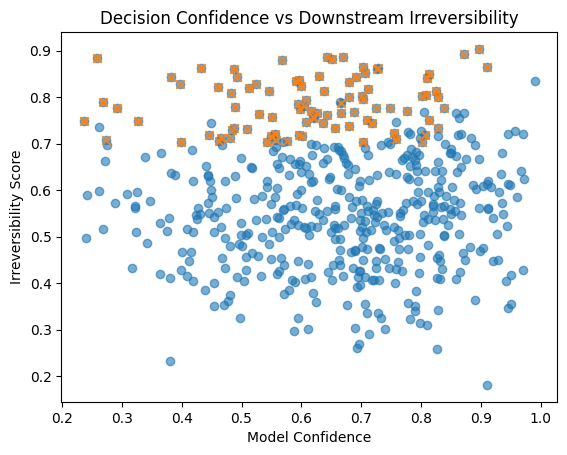

In [21]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(
    decision_context["base_confidence"],
    decision_context["irreversibility_score"],
    alpha=0.6
)
plt.xlabel("Model Confidence")
plt.ylabel("Irreversibility Score")
plt.title("Decision Confidence vs Downstream Irreversibility")
suppressed = decision_context[
    decision_context["decision_outcome"] == "SUPPRESS"
]

plt.scatter(
    suppressed["base_confidence"],
    suppressed["irreversibility_score"],
    marker="x",
    linewidths=1.5
)
plt.show()

## Terminal Assertion: Enforcing Suppression as a Design Requirement

### Context
Abstention is a deliberate system behavior, not a theoretical outcome. High-confidence, high-irreversibility decisions must sometimes be suppressed.

### What This Step Does
Executes a runtime check to ensure that the system actually produces `SUPPRESS` outcomes.  
- The notebook fails if no suppression occurs, enforcing design intent.  
- Silent execution indicates the system correctly exercises suppression.  
- Acts as an **executable guardrail** reflecting the same principle applied in production: the system refuses to act when downstream risk is high.

In [22]:
assert (decision_context["decision_outcome"] == "SUPPRESS").any(), (
    "Design failure: system never suppresses decisions despite irreversibility modeling"
)

# Notebook Summary — Decision Suppression Under Downstream Irreversibility

### Context
This notebook demonstrates a system designed to **refuse to act when downstream decisions carry asymmetric, irreversible, or high-cost consequences**, even when model confidence is high. It explicitly separates model uncertainty, data uncertainty, and decision risk to ensure abstention is a deliberate outcome rather than a failure.

### Key Design Principles Demonstrated
1. **Model Uncertainty** – Confidence dispersion and entropy quantify predictive uncertainty independently of decision consequences.  
2. **Data Uncertainty** – Signal fragility, sparsity, and conflict are treated separately from model behavior.  
3. **Irreversibility Scoring** – Downstream impact is quantified independently, capturing recovery cost, blast radius, and reversibility.  
4. **Decision Risk Composition** – Model uncertainty, data uncertainty, and irreversibility are combined into a structured decision risk surface.  
5. **Suppression, Deferral, and Escalation** – Policies clearly encode when to act, defer, escalate, or suppress, treating abstention as a success state.  
6. **Stress Testing** – Boundary conditions expose counterintuitive cases (high confidence + high irreversibility) to ensure robust policy enforcement.  
7. **Visualization & Auditability** – Portfolio-grade scatter plots overlay suppression regions, making abstention decisions observable.  
8. **Executable Guardrails** – Terminal assertions enforce that suppression occurs, preventing theoretical-only abstention.

### Portfolio Takeaway
This notebook demonstrates **engineering judgment beyond model outputs**. It answers the question:  

> *“What happens when the system should not decide?”*

By designing for deliberate abstention under risk, this notebook showcases how real-world AI systems can balance predictive confidence with downstream safety, creating reliable, auditable, and production-ready decision logic.